In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Data preprocessing for half Second Window

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/Dataset/RAW/dataset_halfSecondWindow.csv')
df

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3,NaN,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4,NaN,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5,NaN,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6,NaN,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7,NaN,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,82695,4066,NaN,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,...,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN,Walking,U1
62581,77608,604,NaN,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,...,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN,Walking,U1
62582,85219,1341,NaN,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,...,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN,Walking,U1
62583,69368,1186,NaN,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,...,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN,Walking,U1


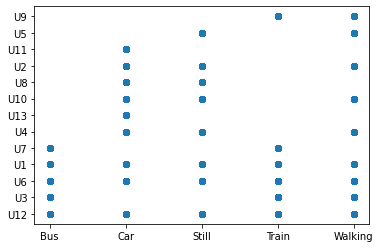

In [ ]:
plt.scatter(df['target'],df['user'])

In [ ]:
df['target'].value_counts()

Car        12518
Bus        12517
Train      12517
Walking    12517
Still      12516
Name: target, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62585 entries, 0 to 62584
Data columns (total 70 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               62585 non-null  int64  
 1   time                                             62585 non-null  int64  
 2   activityrecognition#0                            0 non-null      float64
 3   activityrecognition#1                            62585 non-null  int64  
 4   android.sensor.accelerometer#mean                62585 non-null  float64
 5   android.sensor.accelerometer#min                 62585 non-null  float64
 6   android.sensor.accelerometer#max                 62585 non-null  float64
 7   android.sensor.accelerometer#std                 62583 non-null  float64
 8   android.sensor.game_rotation_vector#mean         54000 non-null  float64
 9   android.sensor.game_rotation

In [ ]:
column_lst = list(df.columns)
mostly_null = []
partially_null = []
no_null = []

In [ ]:
print(column_lst)

['id', 'time', 'activityrecognition#0', 'activityrecognition#1', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.gravity#mean', 'android.sensor.gravity#min', 'android.sensor.gravity#max', 'android.sensor.gravity#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.gyroscope_uncalibrated#min', 'android.sensor.gyroscope_uncalibrated#max', 'android.sensor.gyroscope_uncalibrated#std', 'android.sensor.light#mean', 'android.sensor.light#min', 'android.sensor.light#max', 'android.sensor.light#std', 'android.sensor.linear_acceleration#mean', 'android.sensor.linear_acceler

In [ ]:
for i in column_lst:
    percentage = (df[i].isnull().sum()*100)/62585
    if percentage >= 60:
        mostly_null.append(i)
    elif df[i].isnull().sum() > 0:
        partially_null.append(i)
    elif df[i].isnull().sum() == 0:
        no_null.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 62585")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: id
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: time
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  62585 out of 62585
Missing percentage:100.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  2 out of 62585
Missing percentage:0.003195653910681473%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  8585 out of 62585
Missing percentage:13.717344411600223%

Feat

In [ ]:
if len(mostly_null)+len(partially_null)+len(no_null) == len(column_lst):
    print("True")
else:
    print("False")

True


In [ ]:
mostly_null

['activityrecognition#0',
 'android.sensor.light#std',
 'android.sensor.pressure#mean',
 'android.sensor.pressure#min',
 'android.sensor.pressure#max',
 'android.sensor.pressure#std',
 'android.sensor.proximity#mean',
 'android.sensor.proximity#min',
 'android.sensor.proximity#max',
 'android.sensor.proximity#std',
 'android.sensor.step_counter#mean',
 'android.sensor.step_counter#min',
 'android.sensor.step_counter#max',
 'android.sensor.step_counter#std',
 'sound#std',
 'speed#std']

In [ ]:
for i in mostly_null:
    df = df.drop([i], axis = 1)

In [ ]:
df = df.drop(['id'], axis = 1)

In [ ]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,speed#mean,speed#min,speed#max,target,user
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,0.114439,...,0.809349,0.137706,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,0.654833,0.079211,...,0.997289,0.046025,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,0.713222,0.033566,...,0.981119,0.026574,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,0.748520,0.014745,...,0.938264,0.014528,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,0.749263,0.018754,...,0.972659,0.021917,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,0.834765,0.000162,...,0.837442,0.000220,89.761985,89.761985,89.761985,0.00,0.00,0.00,Walking,U1
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,0.965309,0.012192,...,0.980068,0.002820,89.747010,89.747010,89.747010,1.50,1.50,1.50,Walking,U1
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,0.773370,0.014168,...,0.978259,0.000834,89.729460,89.729460,89.729460,0.00,0.00,0.00,Walking,U1
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,0.789832,0.005423,...,0.787902,0.012880,89.778343,89.778343,89.778343,1.00,1.00,1.00,Walking,U1


In [ ]:
partially_null

['android.sensor.accelerometer#std',
 'android.sensor.game_rotation_vector#mean',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#std',
 'android.sensor.gravity#mean',
 'android.sensor.gravity#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#std',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#mean',
 'android.sensor.light#min',
 'android.sensor.light#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#mean',
 'android.sensor.magnetic_field#min',
 'and

In [ ]:
for i in partially_null:
    print("Partially Null Feature Name:",i)
    print("Number of unique values: ",len(df[i].unique()),"and Number of missing values: ",df[i].isnull().sum())
    print()

Partially Null Feature Name: android.sensor.accelerometer#std
Number of unique values:  47810 and Number of missing values:  2

Partially Null Feature Name: android.sensor.game_rotation_vector#mean
Number of unique values:  35432 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#min
Number of unique values:  35031 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#max
Number of unique values:  35033 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#std
Number of unique values:  12710 and Number of missing values:  10662

Partially Null Feature Name: android.sensor.gravity#mean
Number of unique values:  8433 and Number of missing values:  5534

Partially Null Feature Name: android.sensor.gravity#min
Number of unique values:  8849 and Number of missing values:  5534

Partially Null Feature Name: android.sensor.gravity#max
Number of uni

In [ ]:
for i in partially_null:
    df[i] = df[i].fillna(0)

In [ ]:
newcolumns = list(df.columns)

In [ ]:
for i in newcolumns:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%


In [ ]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,speed#mean,speed#min,speed#max,target,user
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,0.114439,...,0.809349,0.137706,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,0.654833,0.079211,...,0.997289,0.046025,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,0.713222,0.033566,...,0.981119,0.026574,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,0.748520,0.014745,...,0.938264,0.014528,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,0.749263,0.018754,...,0.972659,0.021917,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,0.834765,0.000162,...,0.837442,0.000220,89.761985,89.761985,89.761985,0.00,0.00,0.00,Walking,U1
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,0.965309,0.012192,...,0.980068,0.002820,89.747010,89.747010,89.747010,1.50,1.50,1.50,Walking,U1
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,0.773370,0.014168,...,0.978259,0.000834,89.729460,89.729460,89.729460,0.00,0.00,0.00,Walking,U1
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,0.789832,0.005423,...,0.787902,0.012880,89.778343,89.778343,89.778343,1.00,1.00,1.00,Walking,U1


In [ ]:
df['target'].unique()

array(['Bus', 'Car', 'Still', 'Train', 'Walking'], dtype=object)

In [ ]:
df['target'] = df['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [ ]:
df['user'].unique()

array(['U12', 'U3', 'U6', 'U1', 'U7', 'U4', 'U13', 'U10', 'U8', 'U2',
       'U11', 'U5', 'U9'], dtype=object)

In [ ]:
df['user'] = df['user'].map({'U1':0,'U2':1,'U3':2,'U4':3,'U5':4,'U6':5,'U7':6,'U8':7,'U9':8,'U10':9,'U11':10,'U12':11,'U13':12}) 

In [ ]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,speed#mean,speed#min,speed#max,target,user
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,0.114439,...,0.809349,0.137706,0.000000,0.000000,0.000000,0.00,0.00,0.00,0,11
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,0.654833,0.079211,...,0.997289,0.046025,0.000000,0.000000,0.000000,0.00,0.00,0.00,0,11
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,0.713222,0.033566,...,0.981119,0.026574,0.000000,0.000000,0.000000,0.00,0.00,0.00,0,11
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,0.748520,0.014745,...,0.938264,0.014528,0.000000,0.000000,0.000000,0.00,0.00,0.00,0,11
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,0.749263,0.018754,...,0.972659,0.021917,0.000000,0.000000,0.000000,0.00,0.00,0.00,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,0.834765,0.000162,...,0.837442,0.000220,89.761985,89.761985,89.761985,0.00,0.00,0.00,4,0
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,0.965309,0.012192,...,0.980068,0.002820,89.747010,89.747010,89.747010,1.50,1.50,1.50,4,0
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,0.773370,0.014168,...,0.978259,0.000834,89.729460,89.729460,89.729460,0.00,0.00,0.00,4,0
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,0.789832,0.005423,...,0.787902,0.012880,89.778343,89.778343,89.778343,1.00,1.00,1.00,4,0


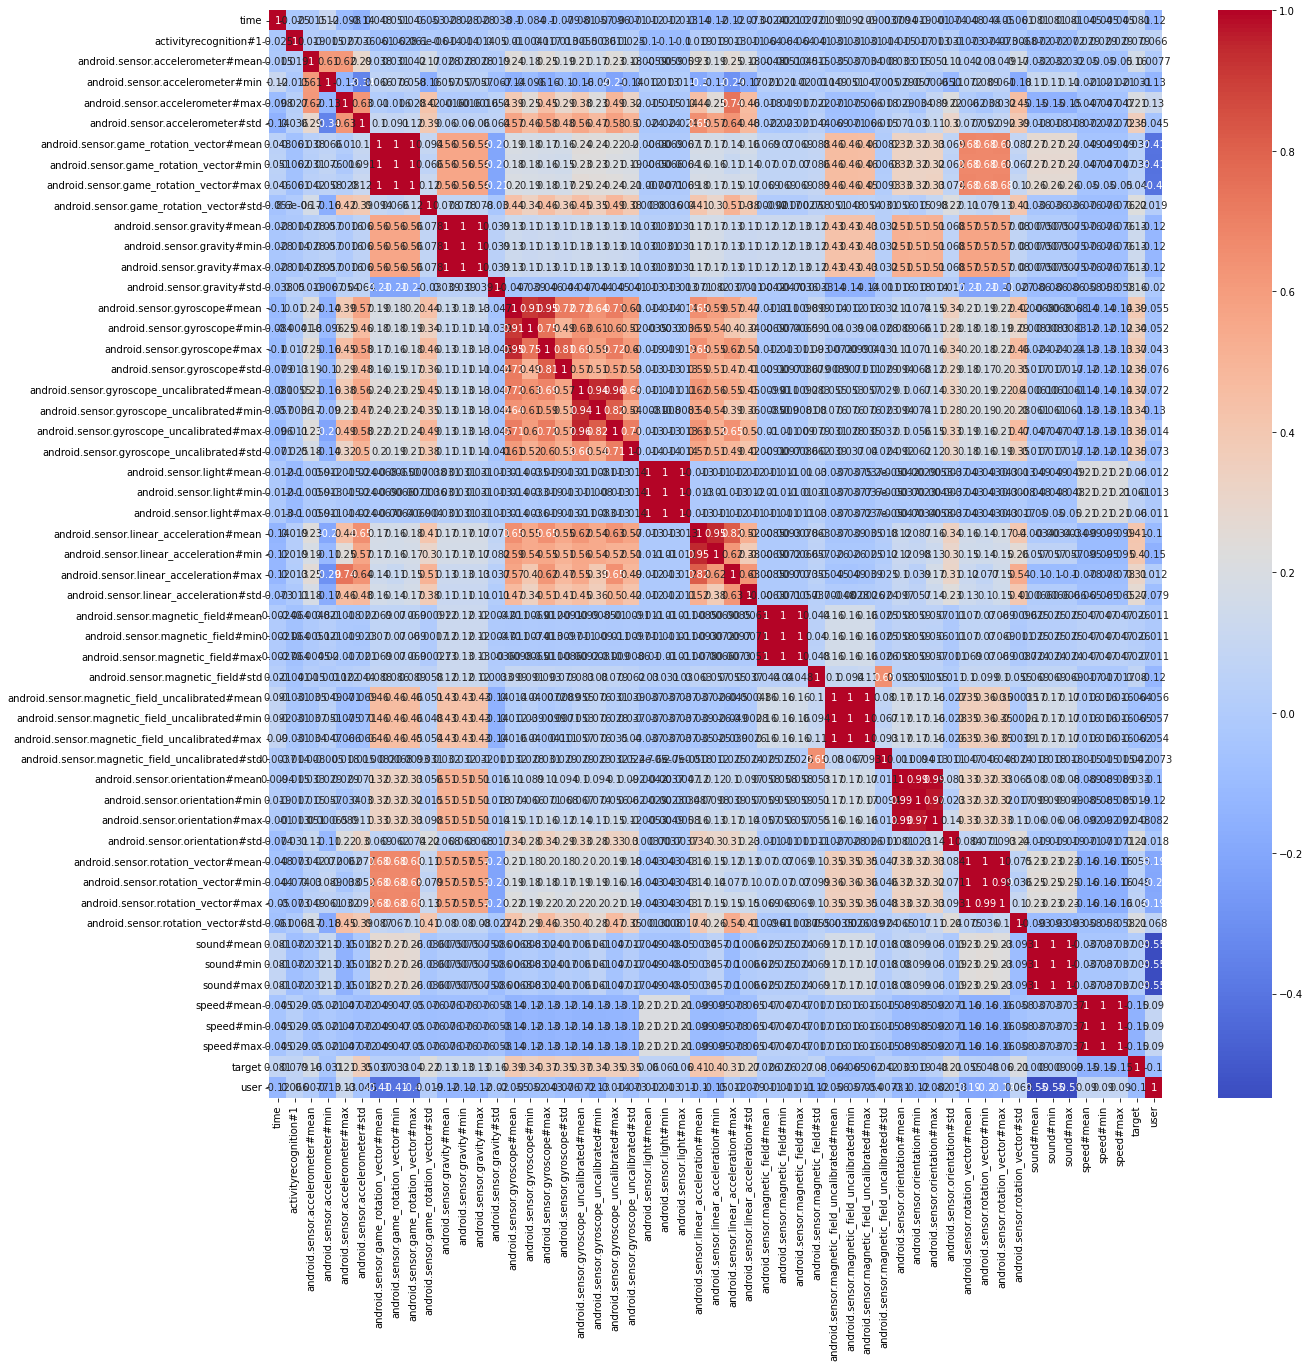

In [ ]:
corr = df.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

27

In [ ]:
corr_features

{'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#max',
 'android.sensor.light#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#min',
 'android.sensor.magnetic_field#max',
 'android.sensor.magnetic_field#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.orientation#max',
 'android.sensor.orientation#min',
 'android.sensor.rotation_vector#max',
 'android.sensor.rotation_vector#min',
 'sound#max',
 'sound#min',
 'speed#max',
 'speed#min'}

In [ ]:
df1 = df.drop(corr_features,axis=1)

In [ ]:
df1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean,target,user
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00,0,11
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00,0,11
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00,0,11
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00,0,11
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00,4,0
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50,4,0
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00,4,0
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00,4,0


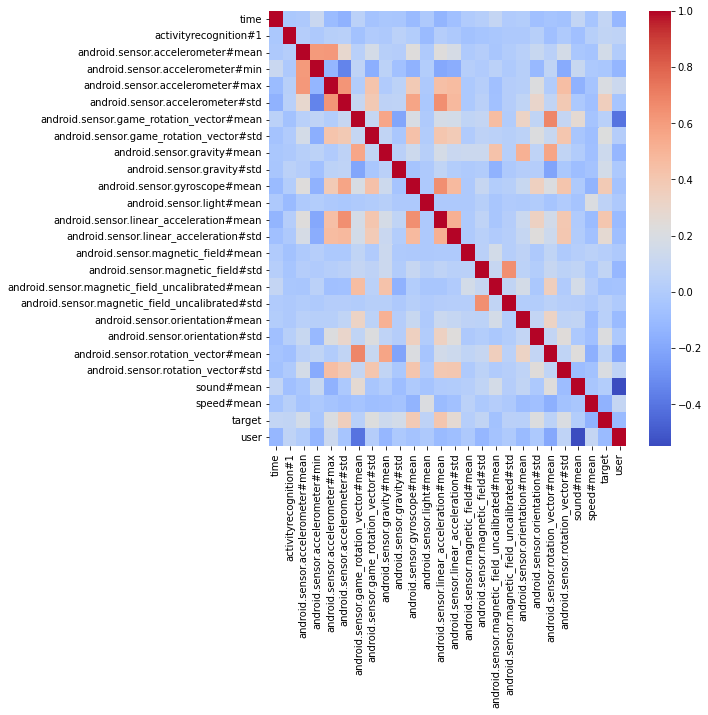

In [ ]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

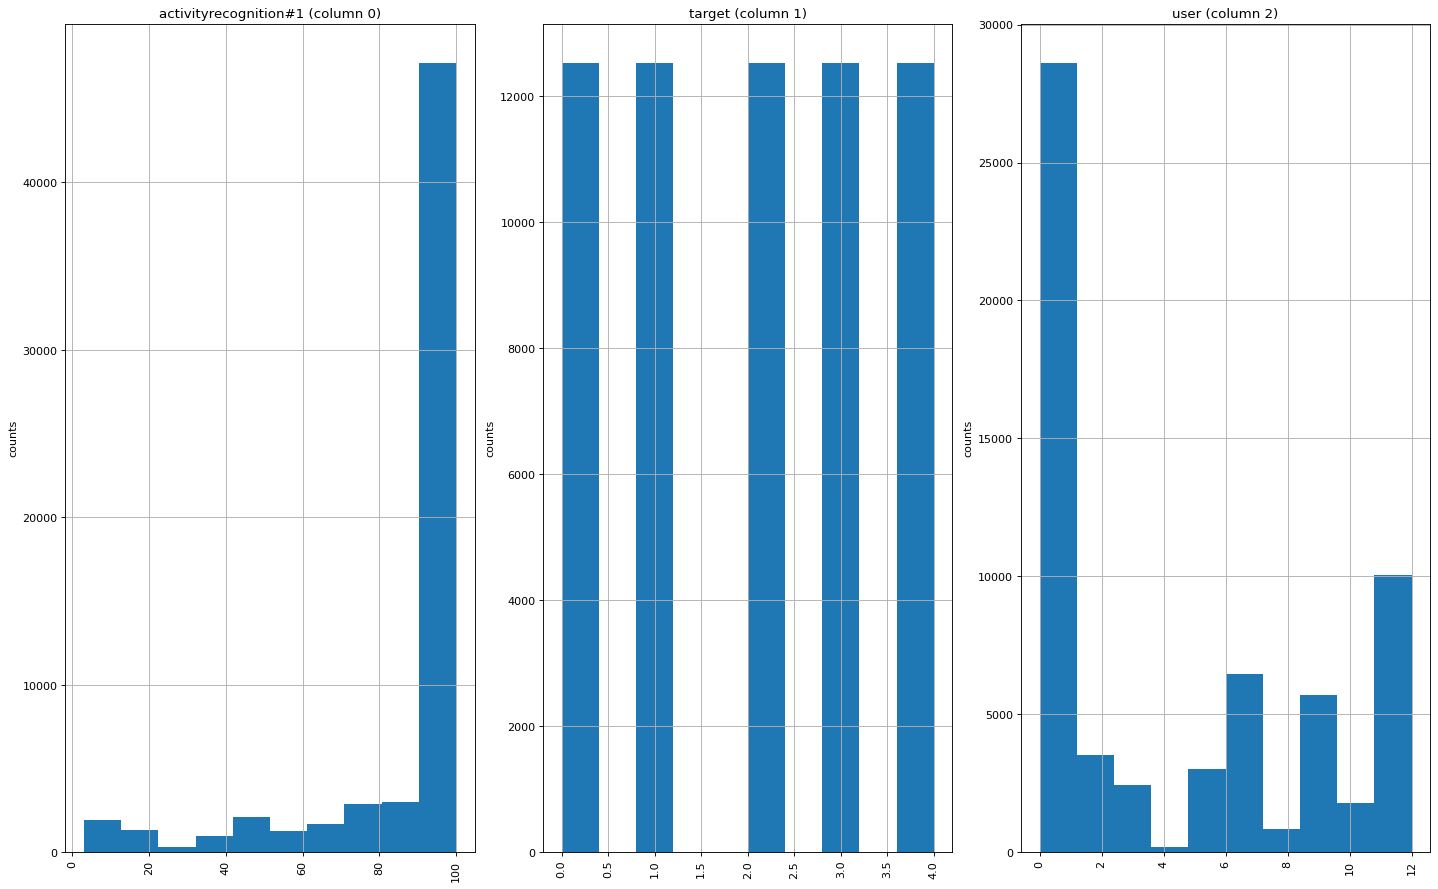

In [ ]:
plotPerColumnDistribution(df1, 10, 5)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62585 entries, 0 to 62584
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   time                                             62585 non-null  int64  
 1   activityrecognition#1                            62585 non-null  int64  
 2   android.sensor.accelerometer#mean                62585 non-null  float64
 3   android.sensor.accelerometer#min                 62585 non-null  float64
 4   android.sensor.accelerometer#max                 62585 non-null  float64
 5   android.sensor.accelerometer#std                 62585 non-null  float64
 6   android.sensor.game_rotation_vector#mean         62585 non-null  float64
 7   android.sensor.game_rotation_vector#std          62585 non-null  float64
 8   android.sensor.gravity#mean                      62585 non-null  float64
 9   android.sensor.gravity#std  

In [ ]:
df1 = df1.drop(['user'], axis = 1)
df1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean,target
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,0.655650,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00,0
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,0.890534,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00,0
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,0.706742,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00,0
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,0.116360,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00,0
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,0.239648,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,0.407428,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00,4
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,0.572358,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50,4
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,0.352223,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00,4
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,3.812070,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00,4


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df1[['target']]).toarray())

final_df = df1.join(enc_df)

In [ ]:
final_df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean,target,0,1,2,3,4
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,0.551880,0.137706,0.000000,0.00,0,1.0,0.0,0.0,0.0,0.0
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,0.943359,0.046025,0.000000,0.00,0,1.0,0.0,0.0,0.0,0.0
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,0.943879,0.026574,0.000000,0.00,0,1.0,0.0,0.0,0.0,0.0
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,0.911758,0.014528,0.000000,0.00,0,1.0,0.0,0.0,0.0,0.0
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,0.926211,0.021917,0.000000,0.00,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,0.837442,0.000220,89.761985,0.00,4,0.0,0.0,0.0,0.0,1.0
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,0.980068,0.002820,89.747010,1.50,4,0.0,0.0,0.0,0.0,1.0
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,0.978259,0.000834,89.729460,0.00,4,0.0,0.0,0.0,0.0,1.0
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,0.787902,0.012880,89.778343,1.00,4,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_df = final_df.drop(['target'], axis = 1)

In [ ]:
final_df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean,0,1,2,3,4
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,20.480671,0.551880,0.137706,0.000000,0.00,1.0,0.0,0.0,0.0,0.0
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,18.099960,0.943359,0.046025,0.000000,0.00,1.0,0.0,0.0,0.0,0.0
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,14.463783,0.943879,0.026574,0.000000,0.00,1.0,0.0,0.0,0.0,0.0
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,20.478035,0.911758,0.014528,0.000000,0.00,1.0,0.0,0.0,0.0,0.0
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,23.746712,0.926211,0.021917,0.000000,0.00,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,0.098269,0.837442,0.000220,89.761985,0.00,0.0,0.0,0.0,0.0,1.0
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,5.171732,0.980068,0.002820,89.747010,1.50,0.0,0.0,0.0,0.0,1.0
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,36.220598,0.978259,0.000834,89.729460,0.00,0.0,0.0,0.0,0.0,1.0
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,1.452735,0.787902,0.012880,89.778343,1.00,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = final_df.iloc[:,0:24] 
y = final_df.iloc[:,24:29]

In [ ]:
X

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field#mean,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,26.294306,0.655650,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,26.295125,0.890534,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,27.048843,0.706742,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,25.878591,0.116360,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,25.599663,0.239648,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,47.952133,0.407428,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,39.067852,0.572358,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,44.275992,0.352223,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,59.172471,3.812070,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00


In [ ]:
y

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
62580,0.0,0.0,0.0,0.0,1.0
62581,0.0,0.0,0.0,0.0,1.0
62582,0.0,0.0,0.0,0.0,1.0
62583,0.0,0.0,0.0,0.0,1.0


In [ ]:

from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (40054, 24) (40054, 5)
Validation Set -> (10014, 24) (10014, 5)
Test Set -> (12517, 24) (12517, 5)


In [ ]:

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(40054, 24) (12517, 24)
(40054, 5) (12517, 5)


In [ ]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:

from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.metrics import Precision, Recall
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

In [ ]:

model = Sequential()
model.add(Dense(256, input_shape=(24,)))
model.add(Activation("relu"))
model.add(Dropout(0.45))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.45))
model.add(Dense(5))
model.add(Activation("softmax"))

517
6144
65536
1280

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               6400      
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                

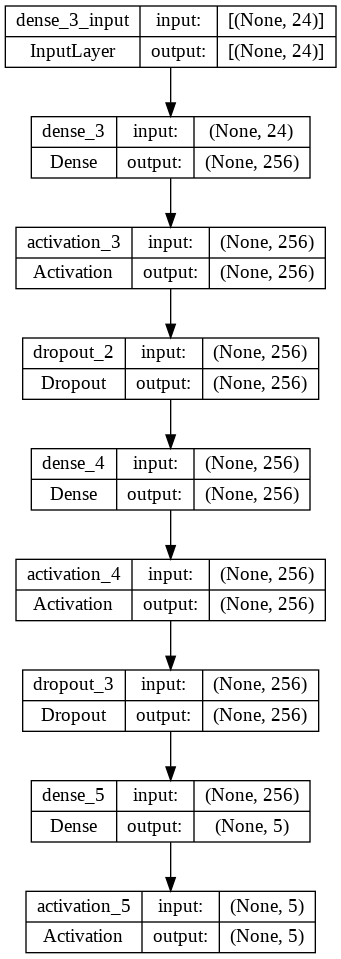

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

In [ ]:
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=128, epochs=60, verbose=1)

Epoch 1/60
313/313 [==============================] - 2s 6ms/step - loss: 0.9540 - accuracy: 0.6282 - precision_1: 0.8049 - recall_1: 0.4183 - val_loss: 0.5869 - val_accuracy: 0.7957 - val_precision_1: 0.8625 - val_recall_1: 0.7062
Epoch 2/60
313/313 [==============================] - 1s 5ms/step - loss: 0.5910 - accuracy: 0.7898 - precision_1: 0.8408 - recall_1: 0.7267 - val_loss: 0.4648 - val_accuracy: 0.8311 - val_precision_1: 0.8645 - val_recall_1: 0.7964
Epoch 3/60
313/313 [==============================] - 1s 5ms/step - loss: 0.5104 - accuracy: 0.8179 - precision_1: 0.8561 - recall_1: 0.7742 - val_loss: 0.4095 - val_accuracy: 0.8599 - val_precision_1: 0.8952 - val_recall_1: 0.8278
Epoch 4/60
313/313 [==============================] - 2s 5ms/step - loss: 0.4622 - accuracy: 0.8363 - precision_1: 0.8695 - recall_1: 0.8025 - val_loss: 0.3749 - val_accuracy: 0.8697 - val_precision_1: 0.8985 - val_recall_1: 0.8423
Epoch 5/60
313/313 [==============================] - 1s 5ms/step - loss

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Loss  : {:.4f}'.format(loss))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9704
Loss  : 0.0938
Precision : 0.9768
Recall    : 0.9654
F1 Score  : 0.9711


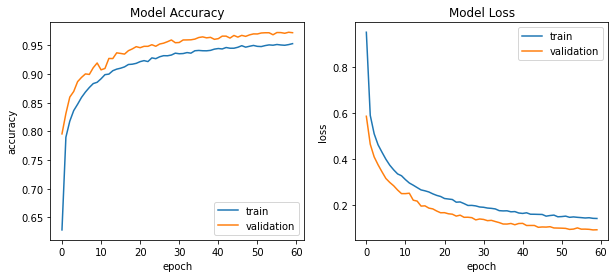

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

392/392 [==============================] - 1s 1ms/step


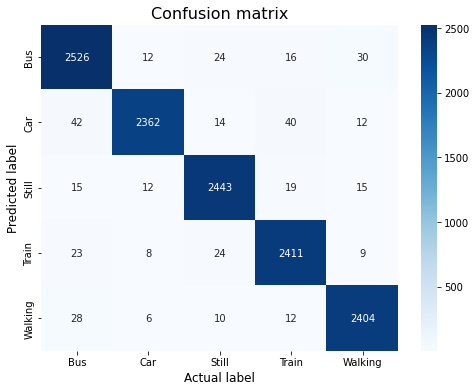

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']    #{'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)